# Lidar Harmonization Notebook

## Quantitative Dataset Exploration

In [2]:
import os
os.chdir("../..")
print(os.getcwd())
from pathlib import Path

from src.dataset.tools.lidar_dataset import LidarDataset


/home/david/bin/python/intensity/src


In [3]:
csv_path = r"dataset/150_190000/master.csv"
dataset = LidarDataset(csv_path)

In [4]:
dataset.df

,Unnamed: 0,examples,flight_num,target_intensity
0,0,/home/david/bin/python/intensity/src/dataset/1...,0,159
1,1,/home/david/bin/python/intensity/src/dataset/1...,4,80
2,2,/home/david/bin/python/intensity/src/dataset/1...,20,107
3,3,/home/david/bin/python/intensity/src/dataset/1...,20,148
4,4,/home/david/bin/python/intensity/src/dataset/1...,20,117
...,...,...,...,...
228323,228323,/home/david/bin/python/intensity/src/dataset/1...,10,45
228324,228324,/home/david/bin/python/intensity/src/dataset/1...,4,182
228325,228325,/home/david/bin/python/intensity/src/dataset/1...,2,143
228326,228326,/home/david/bin/python/intensity/src/dataset/1...,37,394


### Transformation Testing

Transform this data

In [5]:
from src.dataset.tools.transforms import LoadNP, CloudCenter, CloudRotateX, CloudRotateY, CloudRotateZ, CloudIntensityNormalize, CloudJitter

#### Load the NP file

In [7]:
# View the first sample

transforms = LoadNP()
x_original = dataset[0]
print(x_original)
x = transforms(x_original)
print(x)
print(x.shape)

/home/david/bin/python/intensity/src/dataset/150_190000/neighborhoods/0_159_10782.npy
[[3.15560225e+05 2.33571716e+05 1.23680000e+01 ... 2.44585399e-02
  9.99400588e-01 1.00000000e+00]
 [3.15560225e+05 2.33571716e+05 1.23680000e+01 ... 2.44585399e-02
  9.99400588e-01 1.00000000e+00]
 [3.15560228e+05 2.33571700e+05 1.23730000e+01 ... 2.07904888e-02
  9.99741102e-01 0.00000000e+00]
 ...
 [3.15560316e+05 2.33571958e+05 1.23720000e+01 ... 2.33866030e-02
  9.98828082e-01 0.00000000e+00]
 [3.15559980e+05 2.33571803e+05 1.23680000e+01 ... 2.00198200e-02
  9.99796369e-01 0.00000000e+00]
 [3.15559965e+05 2.33571728e+05 1.23630000e+01 ... 3.38613241e-02
  9.99120130e-01 0.00000000e+00]]
(152, 9)


Visualize this neighborhood

<IPython.core.display.Javascript object>


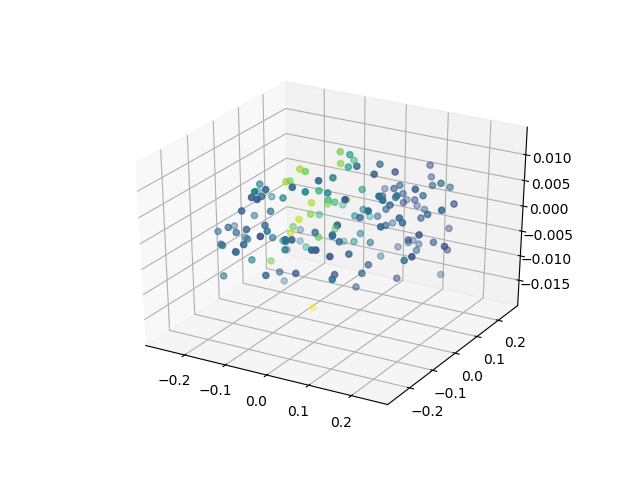

In [12]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0], x[:,1], x[:,2], c=x[:, 3])
plt.show()

#### Center the point cloud

<IPython.core.display.Javascript object>


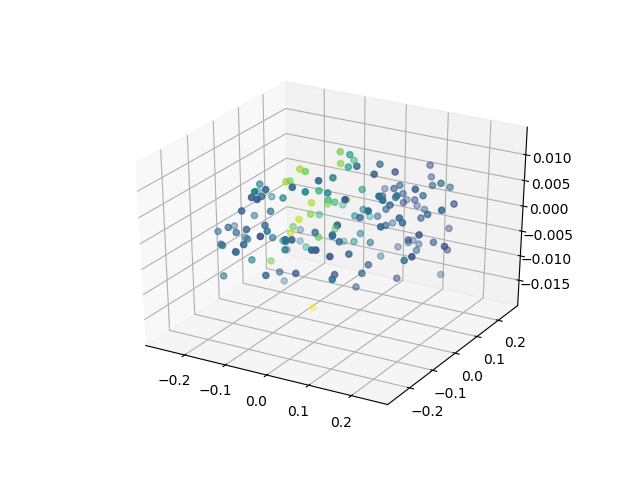

Intenisty Min:  159.0
Intensity Max:  512.0


In [13]:
from torchvision.transforms import Compose

transforms = Compose([LoadNP(), CloudCenter()])
x = transforms(x_original)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0], x[:,1], x[:,2], c=x[:, 3])
plt.show()
print("Intenisty Min: ", x[:, 3].min())
print("Intensity Max: ", x[:, 3].max())

##### Normalize the Intensity

<IPython.core.display.Javascript object>


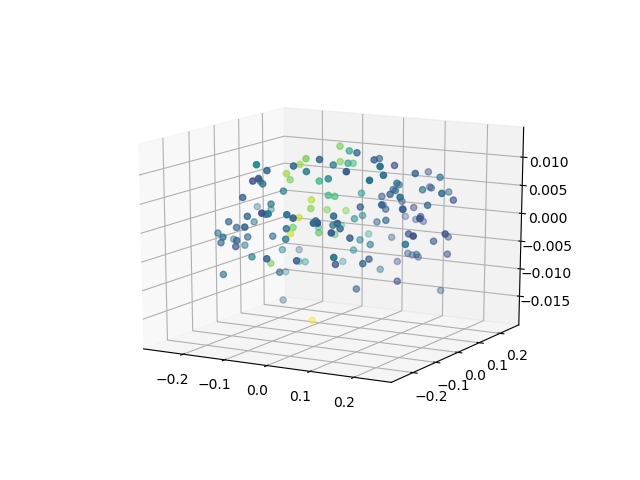

Intenisty Min:  0.310546875
Intensity Max:  1.0


In [14]:
transforms = Compose([LoadNP(), CloudCenter(), CloudIntensityNormalize(512)])
x = transforms(x_original)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0], x[:,1], x[:,2], c=x[:, 3])
plt.show()
print("Intenisty Min: ", x[:, 3].min())
print("Intensity Max: ", x[:, 3].max())

##### Rotations

<IPython.core.display.Javascript object>


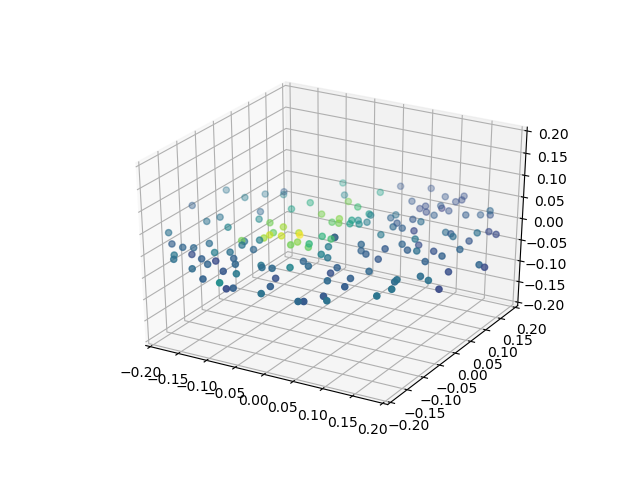

<IPython.core.display.Javascript object>


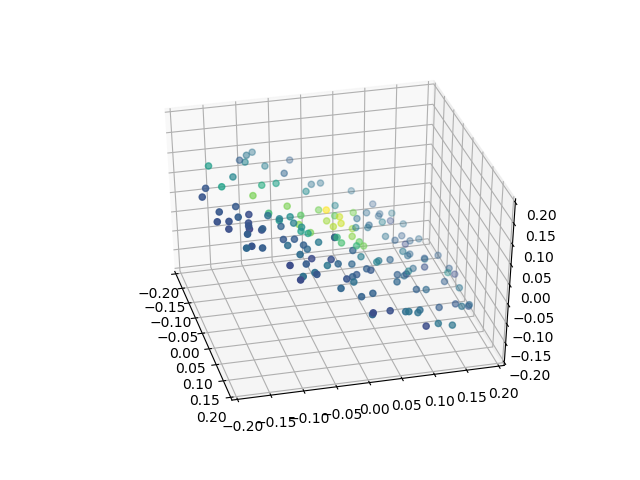

<IPython.core.display.Javascript object>


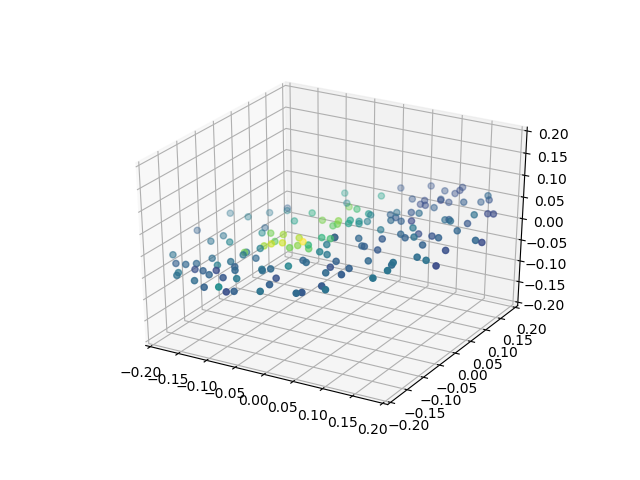

<IPython.core.display.Javascript object>


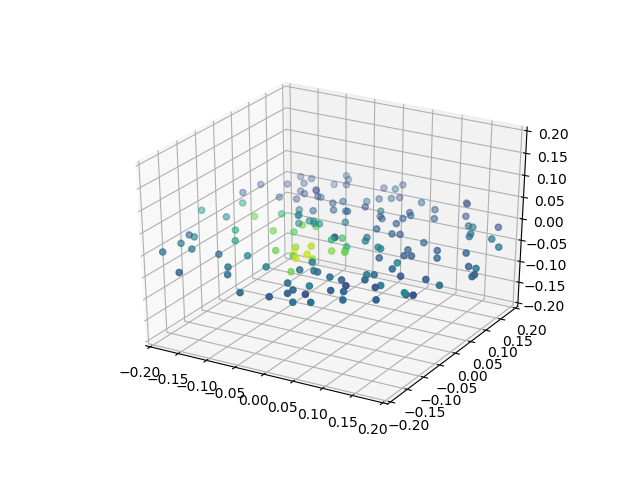

In [28]:



transforms_no_rotate = Compose([LoadNP(), 
                      CloudCenter(), 
                      CloudIntensityNormalize(512)
                     ])
x = transforms_no_rotate(x_original)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0], x[:,1], x[:,2], c=x[:, 3])
ax.set_zlim(-.2, .2)
ax.set_ylim(-.2, .2)
ax.set_xlim(-.2, .2)
plt.show()



transforms = Compose([LoadNP(), 
                      CloudCenter(), 
                      CloudIntensityNormalize(512),
                      CloudRotateX(),
                     ])
x = transforms(x_original)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlim(-.2, .2)
ax.set_ylim(-.2, .2)
ax.set_xlim(-.2, .2)
ax.scatter(x[:,0], x[:,1], x[:,2], c=x[:, 3])
plt.show()

transforms = Compose([LoadNP(), 
                      CloudCenter(), 
                      CloudIntensityNormalize(512),
                      CloudRotateY(),
                     ])
x = transforms(x_original)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlim(-.2, .2)
ax.set_ylim(-.2, .2)
ax.set_xlim(-.2, .2)
ax.scatter(x[:,0], x[:,1], x[:,2], c=x[:, 3])
plt.show()

transforms = Compose([LoadNP(), 
                      CloudCenter(), 
                      CloudIntensityNormalize(512),
                      CloudRotateZ(),
                     ])
x = transforms(x_original)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlim(-.2, .2)
ax.set_ylim(-.2, .2)
ax.set_xlim(-.2, .2)
ax.scatter(x[:,0], x[:,1], x[:,2], c=x[:, 3])
plt.show()

#### Jitter

<IPython.core.display.Javascript object>


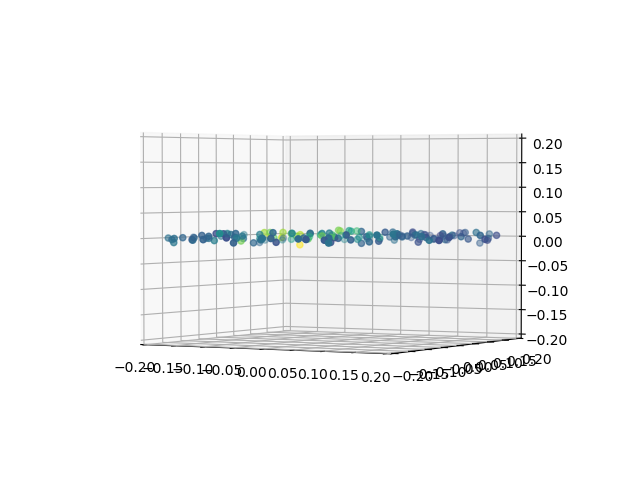

<IPython.core.display.Javascript object>


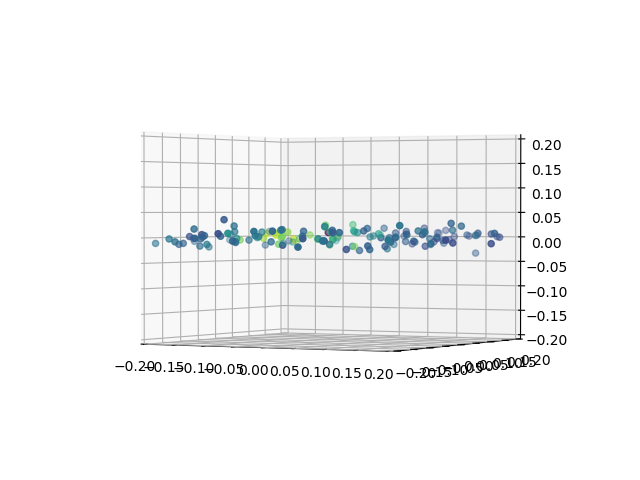

In [31]:
transforms_no_jitter = Compose([LoadNP(), 
                      CloudCenter(), 
                      CloudIntensityNormalize(512)
                     ])



x_nj = transforms_no_jitter(x_original)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0], x[:,1], x[:,2], c=x[:, 3])
ax.set_zlim(-.2, .2)
ax.set_ylim(-.2, .2)
ax.set_xlim(-.2, .2)
plt.show()


transforms = Compose([LoadNP(), 
                      CloudCenter(), 
                      CloudIntensityNormalize(512),
                      CloudJitter(sigma=0.01, clip=0.03)  # How much jitter is good?
                    ])
x = transforms(x_original)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0], x[:,1], x[:,2], c=x[:, 3])
ax.set_zlim(-.2, .2)
ax.set_ylim(-.2, .2)
ax.set_xlim(-.2, .2)
plt.show()

### Dorf Testing

Create synthetically altered data by applying database of response functions to the data